In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2

In [2]:
# db = CaseDB(
#     case_dir = r"/ssd_scratch/hcases",
#     grid_dir = r"/ssd_scratch/hcases"
#     )

db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases"
    )

In [3]:


# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
# choice = "c3a_4.625e5_nobarrier"
# choice = "c3a-barrier"
# choice = "c3d-neut_flux_lim_master"
# choice = "c3c-newmaster"
# choice = "c4a-puff"
choice = "c4b-difflim"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    double_load = True)

/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])
/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.942E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


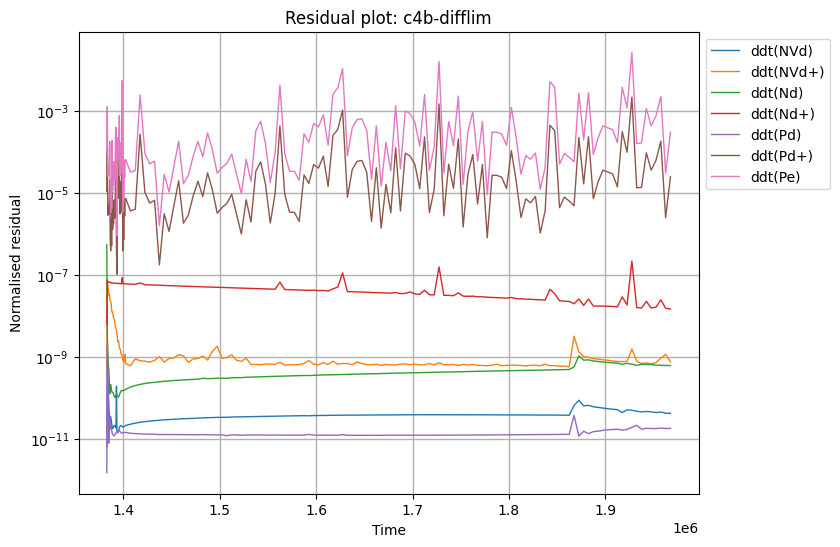

In [4]:
plot_ddt(caseng)

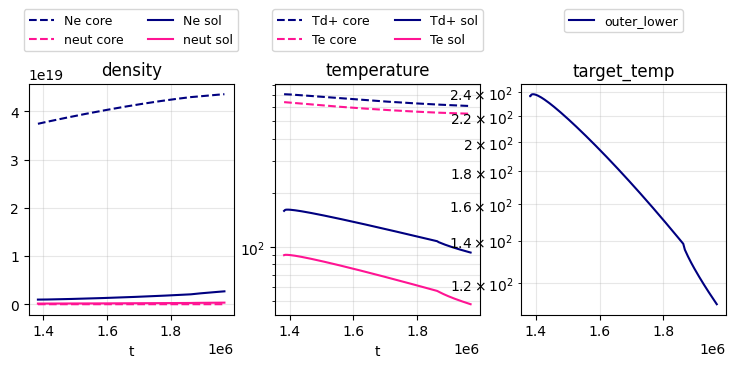

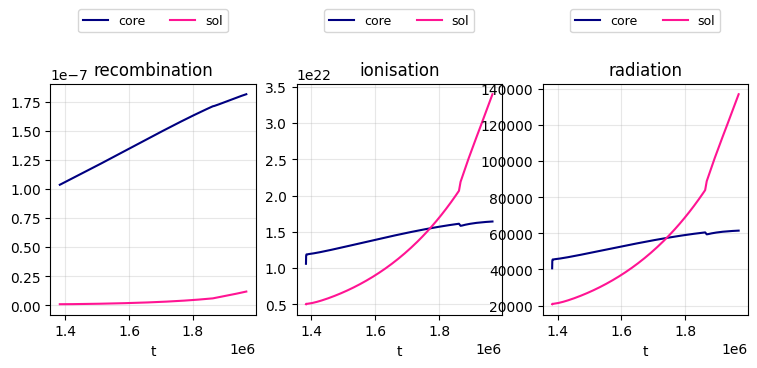

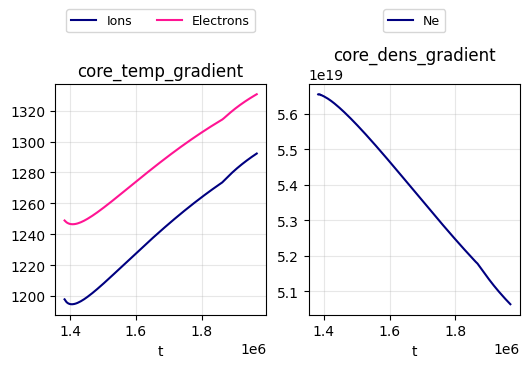

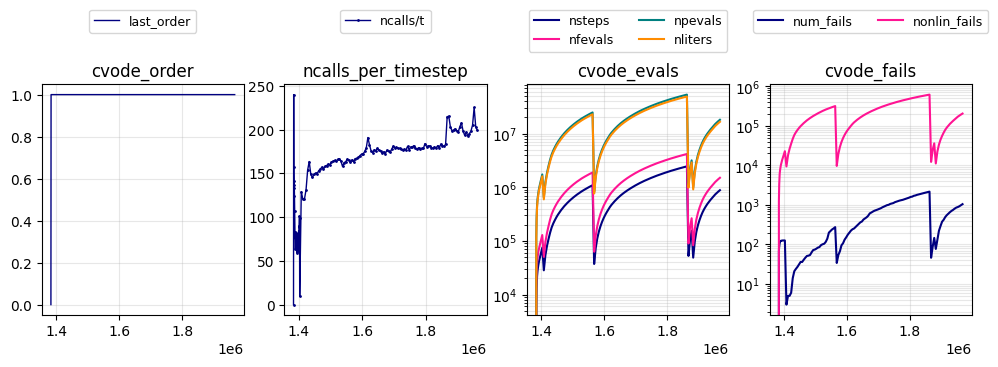

In [5]:
Monitor(case, [["density", "temperature","target_temp"],
               ["recombination", "ionisation", "radiation"],
               ["core_temp_gradient", "core_dens_gradient"],
               ["cvode_order", "ncalls_per_timestep", "cvode_evals", "cvode_fails"]])
# Monitor(case, [["recombination", "ionisation", "radiation"]])

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


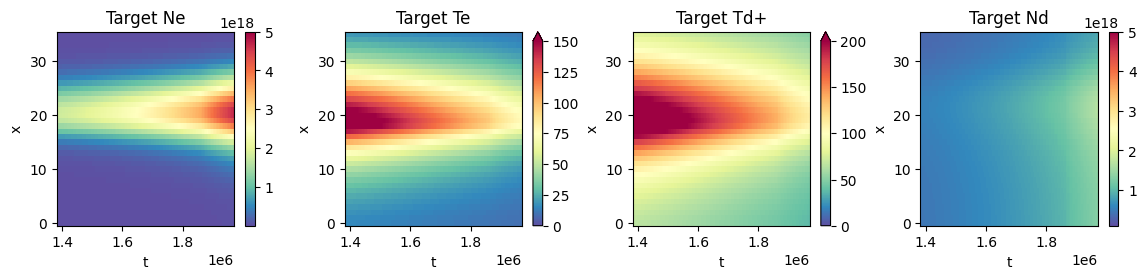

In [10]:
self = Monitor2D(caseng, mode = "target_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"dpi": 100, "xlim":(None, None)},
                    "Ne":{"log": False, "vmax":5e18},
                    "Te":{"vmin":0, "vmax":150},
                    "Td+":{"vmin":0, "vmax":200},
                    "Nd":{"log": False, "vmin":1e17, "vmax":5e18}
                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


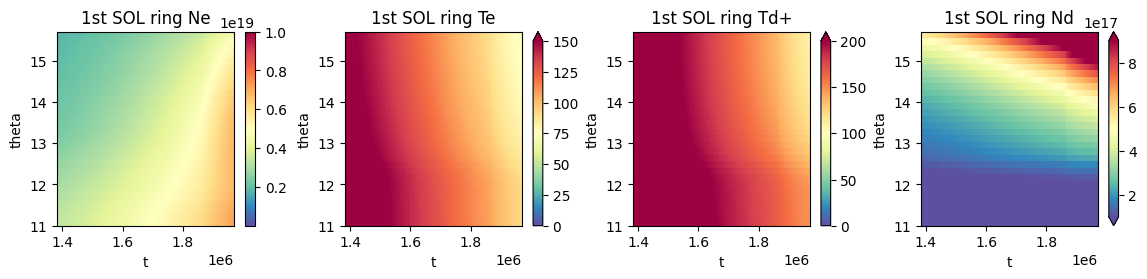

In [17]:
self = Monitor2D(caseng, mode = "field_line_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                  #   "all":{"view":"lower_divertor", "dpi": 100, "xlim":(1.06e6, None)},
                    "Ne":{"log": False, "vmax":1e19},
                    "Te":{"vmin":0, "vmax":150},
                    "Td+":{"vmin":0, "vmax":200},
                    "Nd":{"log": False, "vmin":1e17, "vmax":0.9e18}
                    })

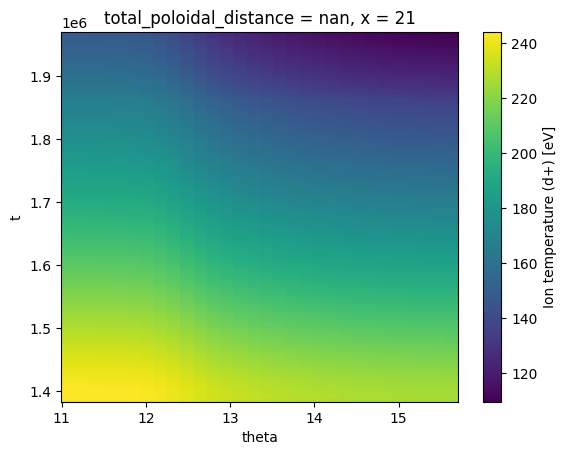

In [13]:
caseng.select_custom_sol_ring(1, "outer_lower")["Td+"].plot()

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 100}


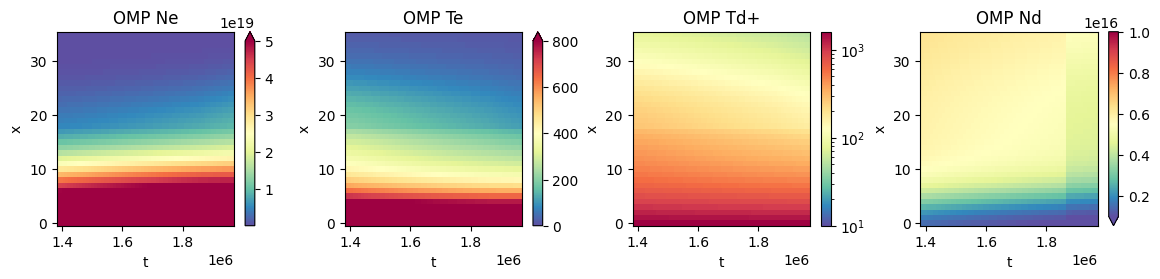

In [8]:
self = Monitor2D(caseng, mode = "omp_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmax":5e19},
                    "Te":{"vmin":0, "vmax":800},
                    "Td+":{"log":True, "vmin":10, "vmax":None},
                    "Nd":{"log": False, "vmin":1e15, "vmax":1e16}
                    })

{'xlim': (None, None), 'ylim': (None, 0), 'figure_aspect': 0.5, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 100}


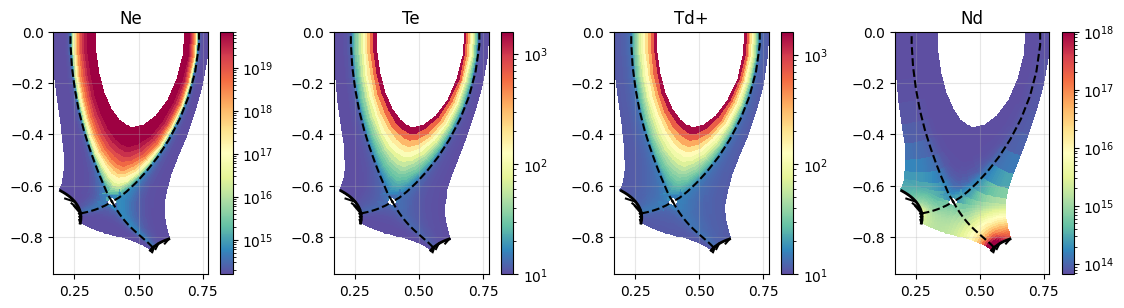

In [9]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmin":None, "vmax":7e19},
                    "Te":{"log":True, "vmin":10, "vmax":None},
                    "Td+":{"log":True, "vmin":10, "vmax":None},
                    "Nd":{"vmin":None, "vmax":1e18}})

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


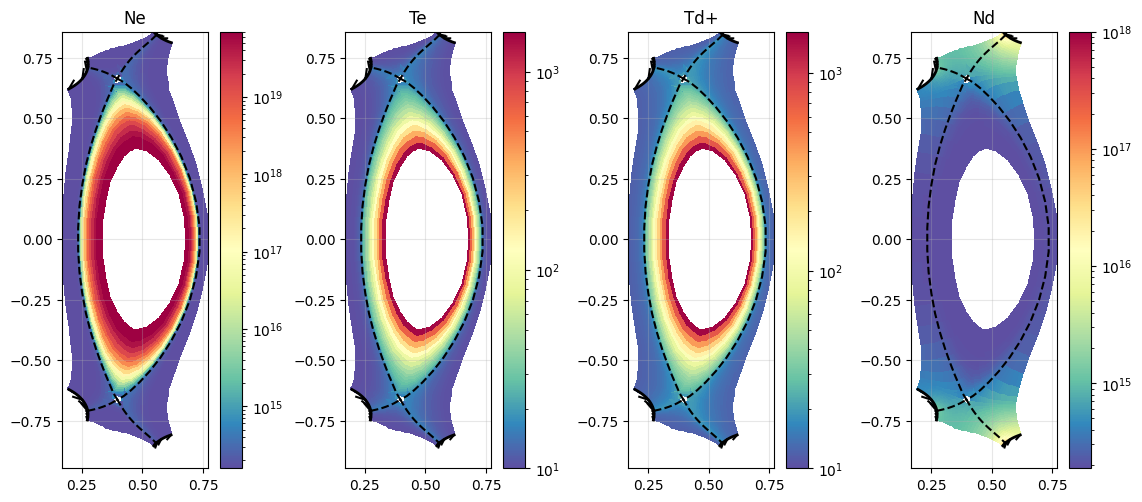

In [10]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":7e19},
                    "Te":{"log":True, "vmin":10, "vmax":None},
                    "Td+":{"log":True, "vmin":10, "vmax":None},
                    "Nd":{"vmin":None, "vmax":1e18}})

In [31]:
caseng.unnormalise(unnormalise_geom = False)

--> dx, dy and J will not be unnormalised


{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 200}


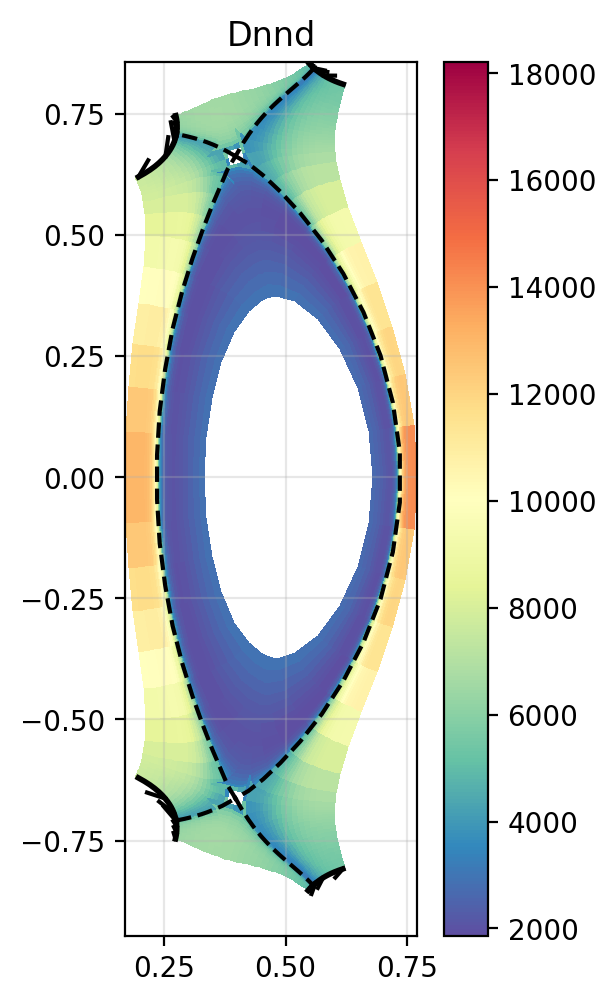

In [10]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Dnnd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 200},
                    "Dnnd":{"log": False, "vmin":None, "vmax":None},

                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 200}


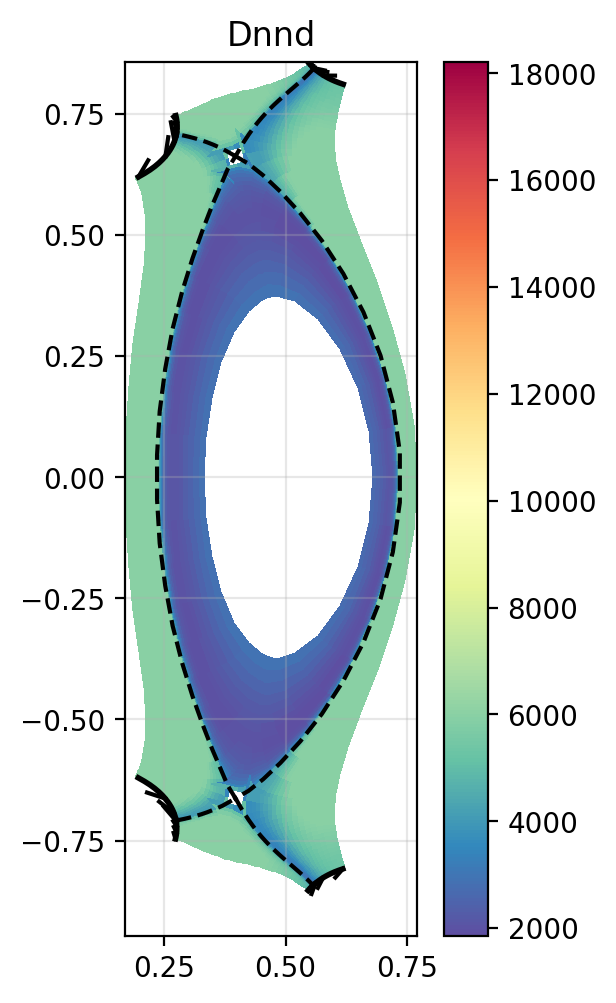

In [14]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Dnnd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 200},
                    "Dnnd":{"log": False, "vmin":None, "vmax":None},

                    })

In [73]:
solps = SOLPSdata()
solps.read_dataframes(r"/users/mjk557/scratch/data/last10s_dfs")
self = solps

/users/mjk557/scratch/data/last10s_dfs loaded


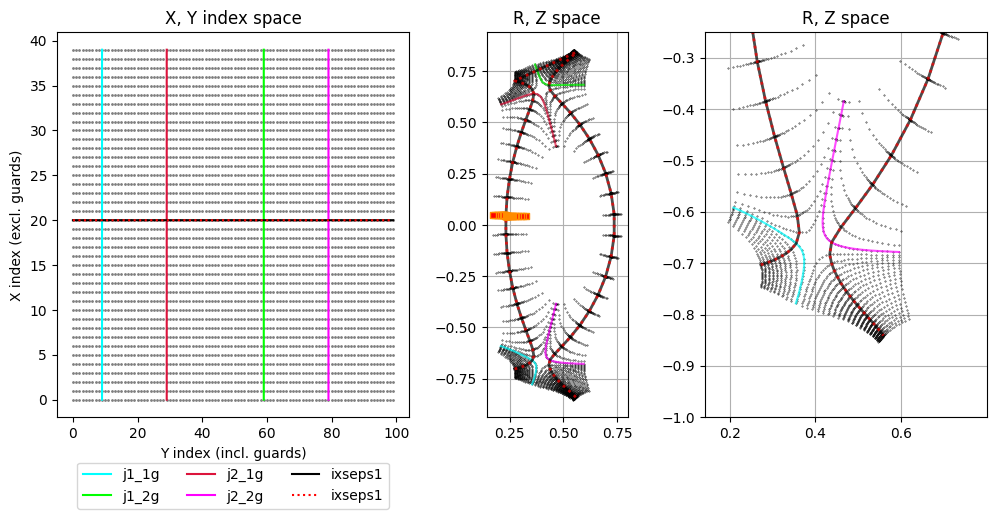

In [87]:
plot_selection(caseng, caseng.select_region("inner_midplane_a"))

In [85]:
display(hermes.omp.head(5))
display(hermes.imp.head(5))

,Td+,Te,Ne,Nd
pos,,,,
-0.052633,1612.761925,1592.896828,7.240873e+19,4.226648e+14
-0.044276,1397.518728,1352.802321,6.915914e+19,4.902728e+14
-0.037123,1213.884670,1153.426335,6.582082e+19,5.929183e+14
-0.030987,1057.562509,987.410957,6.227885e+19,7.171474e+14
-0.025725,925.720411,850.001109,5.841203e+19,8.498681e+14


,Td+,Te,Ne,Nd
pos,,,,
0.093041,1612.762057,1592.896833,7.240936e+19,2.366392e+14
0.079840,1397.518854,1352.802320,6.915980e+19,2.963579e+14
0.068177,1213.884627,1153.426298,6.582146e+19,4.002153e+14
0.057870,1057.561859,987.410795,6.227972e+19,5.503111e+14
0.048783,925.718079,850.000581,5.841268e+19,7.485380e+14


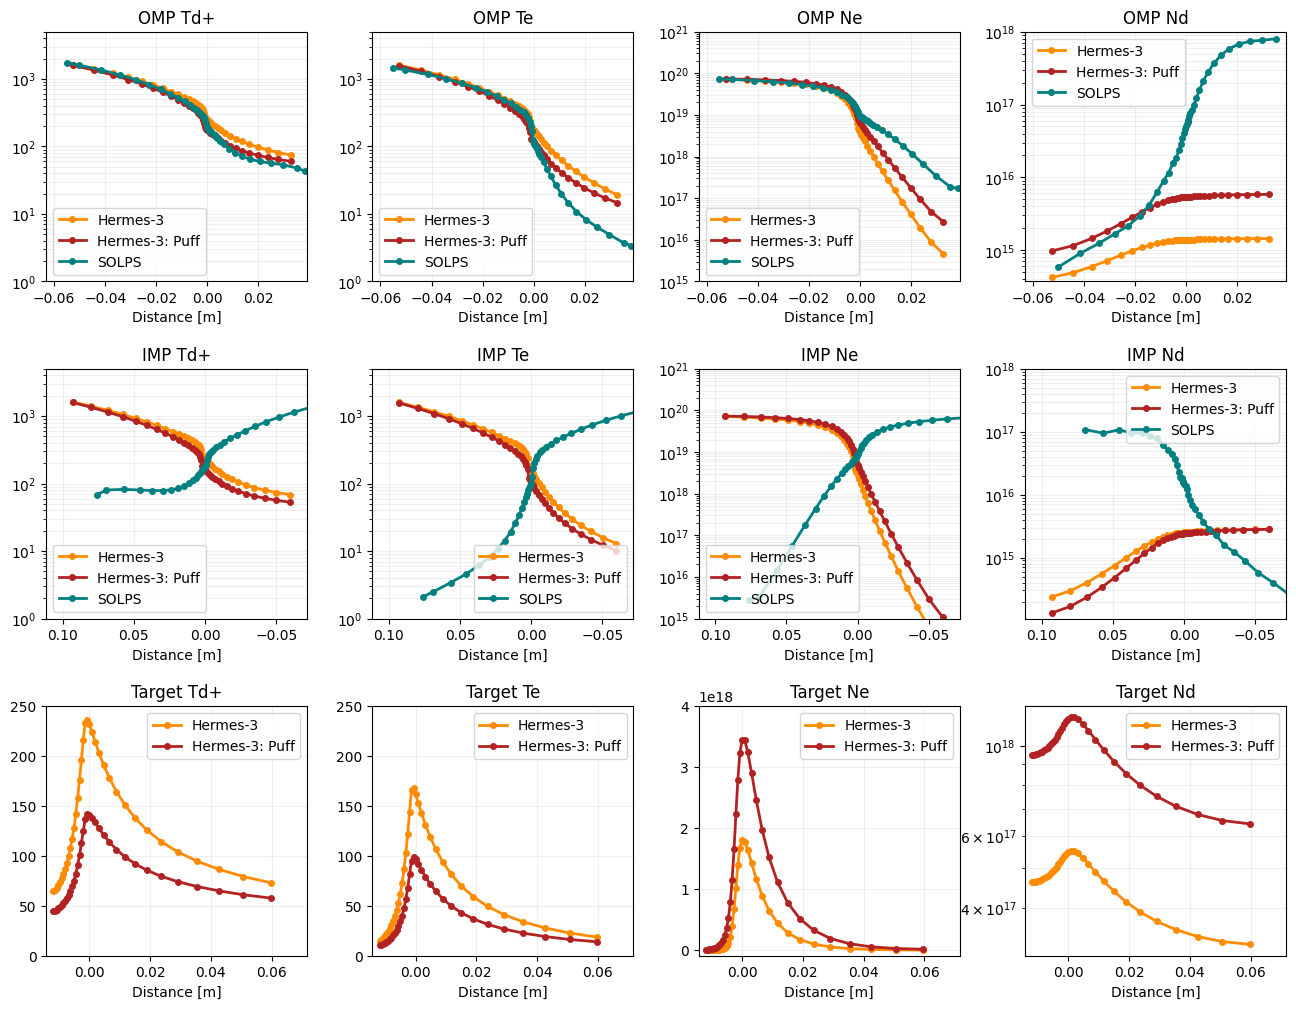

In [80]:
cases = {
    "Hermes-3": hermes, 
    "Hermes-3: Puff": hermes_puff, 
    "SOLPS" : solps, 
    # "SOLEDGE2D": soledge, 
    # "SOLEDGE2D curr": soledge_currents
         }

cols=4; rows=3
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["darkorange", "firebrick", "teal", "deeppink", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 4
lw = 2

set_ylims_omp = {"Td+": (1, 0.5e4), "Te": (1, 0.5e4), "Ne": (1e15, 1e21), "Nd": (None, 1e18)}
set_yscales_omp = {"Td+": "log", "Te": "log", "Ne": "log", "Nd": "log"}
set_axes_omp = {"Td+": axes[0,0], "Te": axes[0,1], "Ne": axes[0,2], "Nd": axes[0,3]}

set_ylims_imp = {"Td+": (1, 0.5e4), "Te": (1, 0.5e4), "Ne": (1e15, 1e21), "Nd": (None, 1e18)}
set_yscales_imp = {"Td+": "log", "Te": "log", "Ne": "log", "Nd": "log"}
set_axes_imp = {"Td+": axes[1,0], "Te": axes[1,1], "Ne": axes[1,2], "Nd": axes[1,3]}

set_ylims_target = {"Td+": (0, 250), "Te": (0, 250), "Ne": (None, 4e18), "Nd": (None, None)}
set_yscales_target = {"Td+": "linear", "Te": "linear", "Ne": "linear", "Nd": "log"}
set_axes_target = {"Td+": axes[2,0], "Te": axes[2,1], "Ne": axes[2,2], "Nd": axes[2,3]}
    
for param in set_ylims_omp.keys():
    
    for i, case in enumerate(cases.keys()):
        
        data = cases[case].omp
        if param in data.columns:
            set_axes_omp[param].plot(data.index, data[param], label = case, c = colors[i], marker = marker, ms = ms, lw = lw)
            set_axes_omp[param].set_ylim(set_ylims_omp[param])
            set_axes_omp[param].set_yscale(set_yscales_omp[param])
            set_axes_omp[param].set_xlim(cases["Hermes-3"].omp.index[0] * 1.2, cases["Hermes-3"].omp.index[-1] * 1.2)
            set_axes_omp[param].set_title(f"OMP {param}")
            
        data = cases[case].imp
        if param in data.columns:
            set_axes_imp[param].plot(data.index, data[param], label = case, c = colors[i], marker = marker, ms = ms, lw = lw)
            set_axes_imp[param].set_ylim(set_ylims_imp[param])
            set_axes_imp[param].set_yscale(set_yscales_imp[param])
            set_axes_imp[param].set_xlim(cases["Hermes-3"].imp.index[0] * 1.2, cases["Hermes-3"].imp.index[-1] * 1.2)
            set_axes_imp[param].set_title(f"IMP {param}")
            
        data = cases[case].outer_lower
        if param in data.columns:
            set_axes_target[param].plot(data.index, data[param], label = case, c = colors[i], marker = marker, ms = ms, lw = lw)
            if set_ylims_target[param] != (None,None):
                set_axes_target[param].set_ylim(set_ylims_target[param])
            set_axes_target[param].set_yscale(set_yscales_target[param])
            set_axes_target[param].set_xlim(cases["Hermes-3"].outer_lower.index[0] * 1.2, cases["Hermes-3"].outer_lower.index[-1]*1.2)
            set_axes_target[param].set_title(f"Target {param}")
            
        
    
    
# for j in range(cols):
#     axes[0, j].set_xlim(None, 0.05)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()

In [128]:
soledge = SOLEDGEdata()
soledge.read_csv(r"/users/mjk557/scratch/data/soledge_2022_12_15/plot1d_no_curr.csv", mode = "plot1d")
soledge.read_csv(r"/users/mjk557/scratch/data/soledge_2022_12_15/wall_ntmpi_no_curr.csv", mode = "wall_ntmpi")


solps = SOLPSdata()
solps.read_dataframes(r"/users/mjk557/scratch/data/last10s_dfs")

hermes = Hermesdata()
hermes.read_case(caseng, tind = 0)

hermes_puff = Hermesdata()
hermes_puff.read_case(caseng, tind = -1)

/users/mjk557/scratch/data/last10s_dfs loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


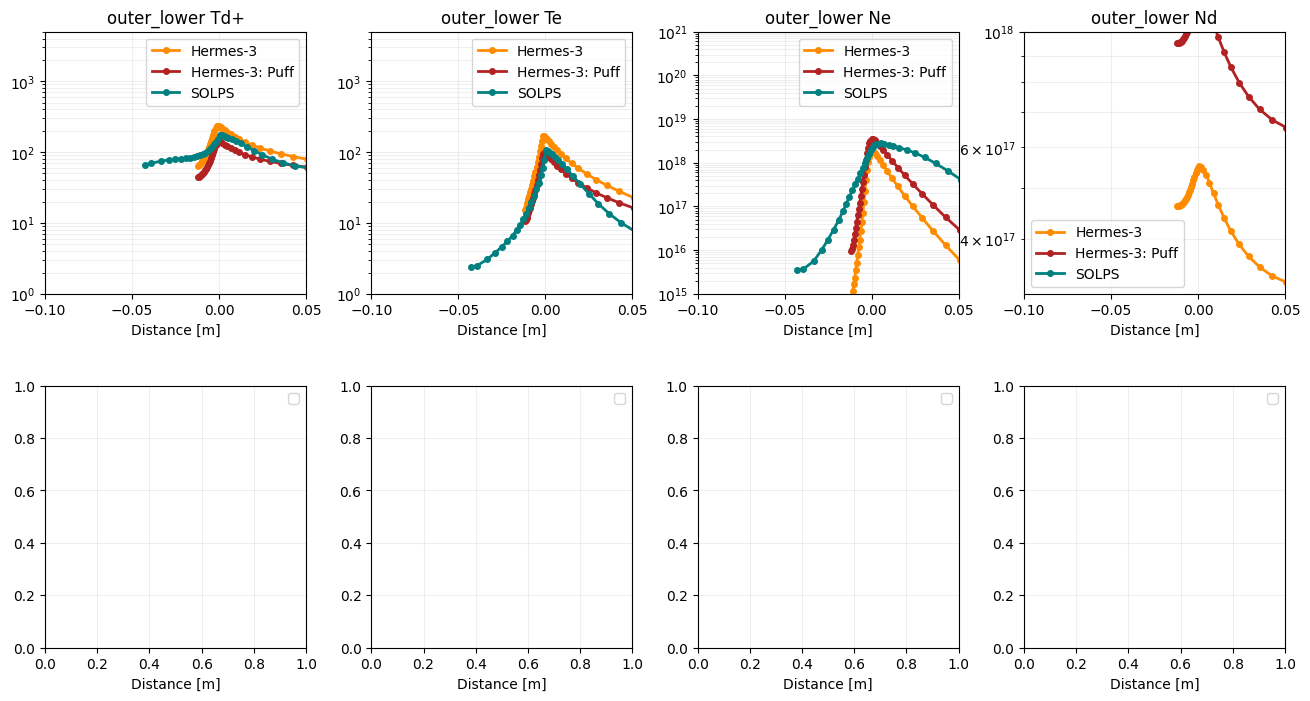

In [130]:
datasets = {
    "Hermes-3": hermes, 
    "Hermes-3: Puff": hermes_puff, 
    "SOLPS" : solps, 
    # "SOLEDGE2D": soledge, 
    # "SOLEDGE2D curr": soledge_currents
         }

cols=4; rows=2
fig, axes = plt.subplots(rows,cols, dpi = 100, figsize = (4*cols,4*rows))
fig.subplots_adjust(hspace = 0.35, wspace = 0.25)
colors = ["darkorange", "firebrick", "teal", "deeppink", "firebrick",  "limegreen", "magenta","cyan", "navy"]

marker = "o"
ms = 4
lw = 2


set_ylims = {"Td+": (1, 0.5e4), "Te": (1, 0.5e4), "Ne": (1e15, 1e21), "Nd": (None, 1e18)}
set_yscales = {"Td+": "log", "Te": "log", "Ne": "log", "Nd": "log"}
set_axes = {"Td+": axes[0,0], "Te": axes[0,1], "Ne": axes[0,2], "Nd": axes[0,3]}
    
region = "outer_lower"
params = datasets["Hermes-3"].regions[region].columns

for param in params:
    
    for i, dataset_name in enumerate(datasets.keys()):
        data = datasets[dataset_name].regions[region]
        
        if param in data.columns:
            set_axes[param].plot(data.index, data[param], label = dataset_name, c = colors[i], marker = marker, ms = ms, lw = lw)
            if set_ylims[param] != (None,None):
                set_axes[param].set_ylim(set_ylims[param])
            set_axes[param].set_yscale(set_yscales[param])
            set_axes[param].set_xlim(cases["Hermes-3"].outer_lower.index[0] * 1.2, cases["Hermes-3"].outer_lower.index[-1]*1.2)
            set_axes[param].set_title(f"{region} {param}")
            
        
    
    
for j in range(cols):
    axes[0, j].set_xlim(-0.1, 0.05)

for i in range(rows):
    for j in range(cols):
        axes[i,j].grid(which="both", alpha = 0.2)
        axes[i,j].set_xlabel("Distance [m]")
        axes[i,j].legend()

In [118]:
datasets[dataset_name].regions

{'omp':                    Td+           Te            Ne            Nd
 pos                                                            
 -0.052633  1612.761925  1592.896828  7.240873e+19  4.226648e+14
 -0.044276  1397.518728  1352.802321  6.915914e+19  4.902728e+14
 -0.037123  1213.884670  1153.426335  6.582082e+19  5.929183e+14
 -0.030987  1057.562509   987.410957  6.227885e+19  7.171474e+14
 -0.025725   925.720411   850.001109  5.841203e+19  8.498681e+14
 -0.021225   815.657430   737.221506  5.413502e+19  9.772484e+14
 -0.017395   724.633408   645.443334  4.942775e+19  1.088030e+15
 -0.014154   649.966582   571.327761  4.434922e+19  1.176466e+15
 -0.011433   589.121844   511.819732  3.903664e+19  1.242430e+15
 -0.009168   539.748474   464.136730  3.368688e+19  1.289272e+15
 -0.007303   499.656633   425.737544  2.852090e+19  1.321453e+15
 -0.005784   466.780249   394.295490  2.374251e+19  1.343117e+15
 -0.004563   439.147334   367.688679  1.949684e+19  1.357548e+15
 -0.003592   414.8

In [107]:
hermes.regions["omp"].columns

Index(['Td+', 'Te', 'Ne', 'Nd'], dtype='object')

Text(0, 0.5, 'Ncalls / time')

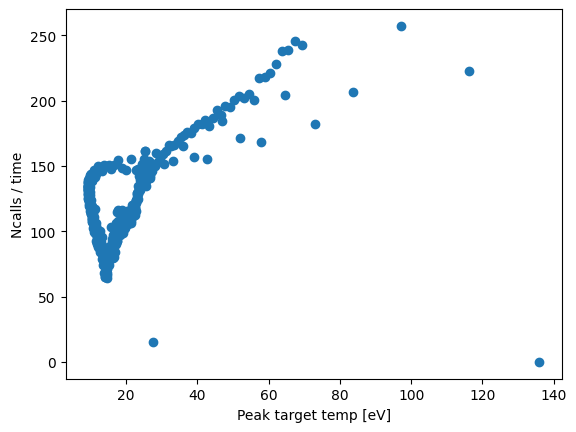

In [ ]:
fig, ax = plt.subplots()

ax.scatter(target_temp[0:-1], ncalls_per_t)
ax.set_xlabel("Peak target temp [eV]")
ax.set_ylabel("Ncalls / time")

{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}
{'plot': {'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9}}


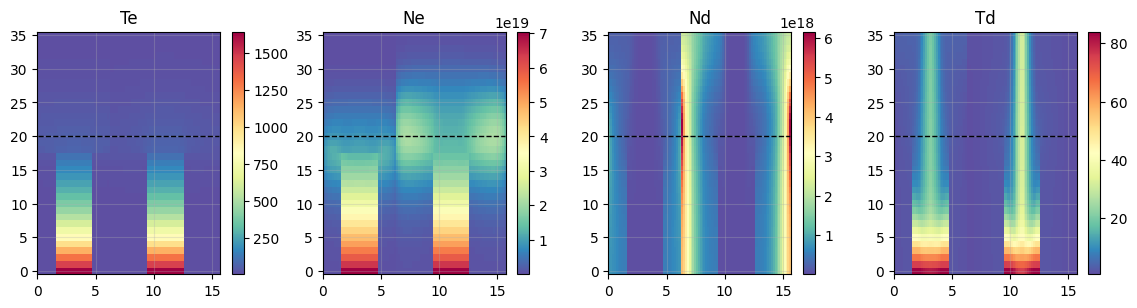

In [ ]:
Monitor2D(caseng, "grid", [["Te", "Ne", "Nd", "Td"]])

In [ ]:
pkl_path = r"/users/mjk557/scratch/last10s.pkl"

def read_from_pickle(path):
    with open(path, 'rb') as file:
        try:
            while True:
                return pkl.load(file)
        except EOFError:
            pass
        
x = read_from_pickle(pkl_path)

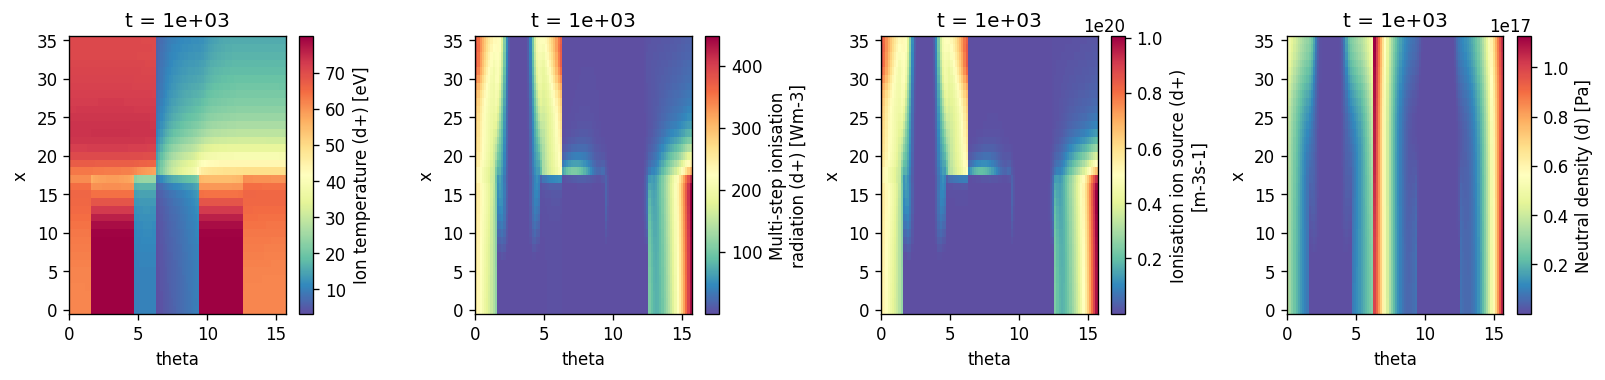

In [ ]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*4,3), dpi = 120)
fig.subplots_adjust(wspace = 0.5)
# fig.tight_layout(pad = 1)
time = self.ds["t"][-1]

data["Td+"].sel(t=time).plot(ax = axes[0], cmap = "Spectral_r",
# vmin = 53, vmax = 1600, 
)
(data["Rd+_ex"].sel(t=time)*-1).plot(ax = axes[1], cmap = "Spectral_r", 
)
data["Sd+_iz"].sel(t=time).plot(ax = axes[2], cmap = "Spectral_r",
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].sel(t=time).plot(ax = axes[3], cmap = "Spectral_r", 
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

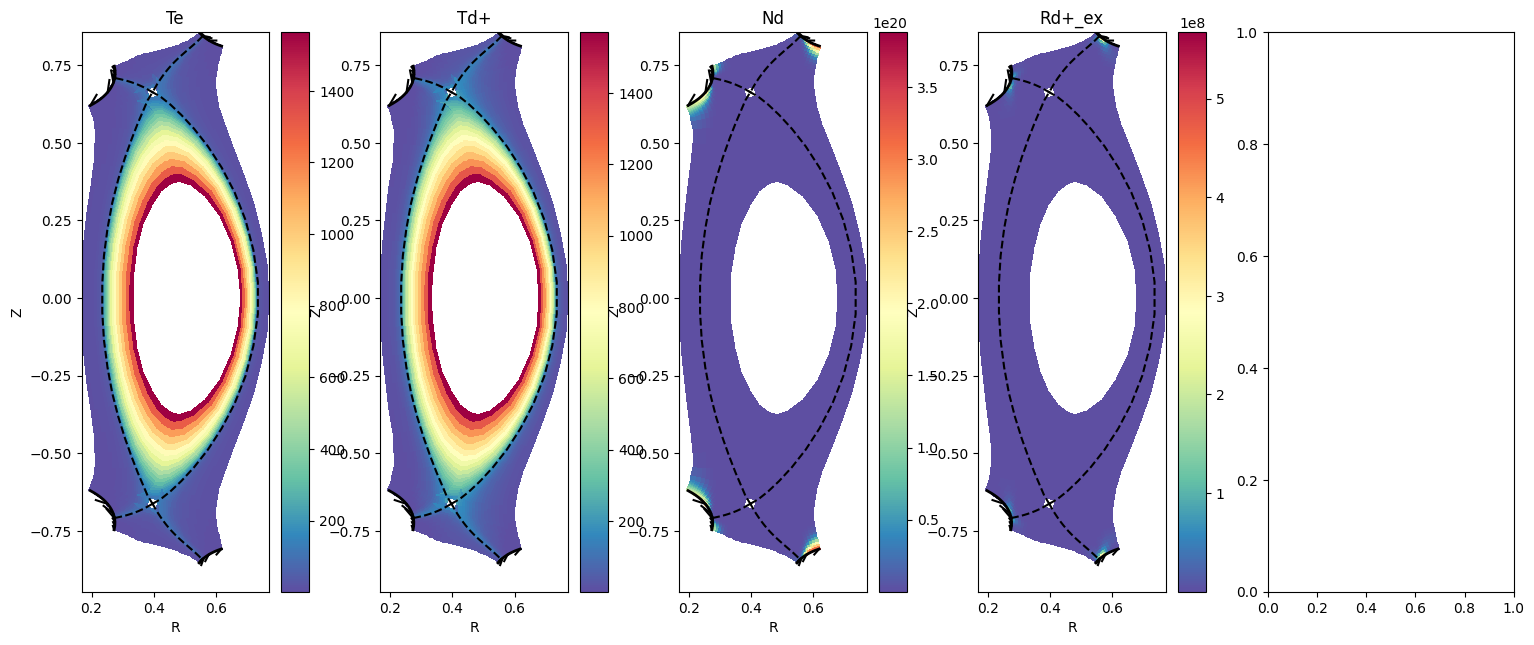

In [ ]:
data = caseng.ds

cols = 5
fig, axes = plt.subplots(1,cols, figsize = (cols*3,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = -1

data["Te"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False,
# vmin = 53, vmax = 1600, 
)

data["Td+"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False,
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False,
# vmin = 9.7e13, vmax = 2.9e19, 
)
(data["Rd+_ex"].isel(t=tind)*-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = False, 
)
# (data["Sd+_iz"].isel(t=tind)).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

In [ ]:
import grid_fields
meshwrapper = grid_fields.Mesh(r"/users/mjk557/scratch/cases/st40/b2b-allsource_newmaster_scratch/g3a3f3-allflux_proper.nc")

m = meshwrapper.mesh

for param in ["Pd+_src", "Pe_src", "Nd+_src"]:
    print(f'\n-> {param}:')
    print(f'Set: {set(m[param].flatten())}')
    print(f'Integral: {(m[param].squeeze() * meshwrapper.dv).sum()}')



-> Pd+_src:
Set: {0.0, 15200943.283049459}
Integral: 1000000.0

-> Pe_src:
Set: {0.0, 11552716.895117588}
Integral: 760000.0

-> Nd+_src:
Set: {0.0, 2.280141492457419e+22}
Integral: 1.5e+21


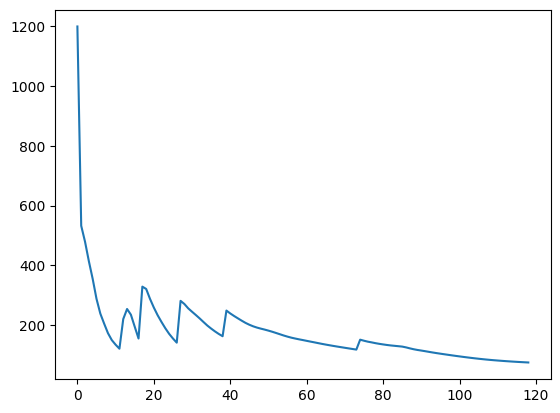

In [ ]:
plt.plot(target.peak_temperature)

In [27]:
solps = file_read(r"/users/mjk557/scratch/last10s.pkl")

dfs = dict()
for key in solps.keys():
    dfs[key] = pd.DataFrame(solps[key])

file_write(dfs, "/users/mjk557/scratch/data/last10s_dfs")

# for key in solps.keys():
    
#     print(f"{key}: {solps[key].shape}")
    # if len(solps[key]) == 36:
    #     df_36[key] = solps[key]
    # elif len(solps[key]) == 38:
    #     df_38[key] = solps[key]
         
    # print(f"{key}: {len(solps[key])}")

In [24]:
dfs

{'ti3da':            0          1
 0  -0.055027  1746.0700
 1  -0.050268  1605.0900
 2  -0.041566  1356.8200
 3  -0.034205  1145.5700
 4  -0.027971   968.5640
 5  -0.022710   824.4100
 6  -0.018266   701.9010
 7  -0.014531   603.3960
 8  -0.011439   527.0820
 9  -0.008903   465.4220
 10 -0.006851   416.0140
 11 -0.005200   376.5330
 12 -0.003895   344.2270
 13 -0.002879   316.8010
 14 -0.002096   292.3540
 15 -0.001493   270.0030
 16 -0.001012   248.1300
 17 -0.000594   223.6630
 18 -0.000184   191.0850
 19  0.000184   181.0390
 20  0.000493   176.9020
 21  0.000808   172.7930
 22  0.001169   168.1560
 23  0.001618   162.4170
 24  0.002199   155.0860
 25  0.002956   145.7900
 26  0.003927   134.3770
 27  0.005156   121.1430
 28  0.006690   106.8970
 29  0.008573    92.9317
 30  0.010848    80.7470
 31  0.013562    71.2762
 32  0.016762    64.5228
 33  0.020491    59.9317
 34  0.024791    56.6268
 35  0.029710    53.4259
 36  0.035292    47.6872
 37  0.038284    42.9978,
 'te3da':      